### Toronto Centrelines 2022-02
This file loads and the Toronto Centreline dataset using geopandas (found at https://ckan0.cf.opendata.inter.prod-toronto.ca/ne/dataset/toronto-centreline-tcl).
(cycling traffic counts can be found here https://ckan0.cf.opendata.inter.prod-toronto.ca/en/dataset/traffic-counts-cycling)
Work performed:
- load data
- perform eda in combination with cycling traffic counts
- store in geopandas df and create some plots

#### Imports:

In [2]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('dark_background')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

#### Import the raw data into a dataframe
data is in the raw data project folder

In [3]:
# Import the csv data into pandas 
toronto_centrelines = pd.read_csv('C:/Users/keaga/PycharmProjects/1498-ML-Project/data/raw_data/c27de287-4e8e-4d1d-94b0-e27d57cf7ae7.csv')

toronto_centrelines.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/keaga/PycharmProjects/1498-ML-Project/data/raw_data/c27de287-4e8e-4d1d-94b0-e27d57cf7ae7.csv'

In [4]:
# Take a look at the geometry column
print(toronto_centrelines.shape)
toronto_centrelines['geometry'].head()
# Geometry information is stored in a dictionary/json format.


(70826, 42)


0    {"type": "LineString", "coordinates": [[-79.50...
1    {"type": "LineString", "coordinates": [[-79.50...
2    {"type": "LineString", "coordinates": [[-79.51...
3    {"type": "LineString", "coordinates": [[-79.51...
4    {"type": "LineString", "coordinates": [[-79.51...
Name: geometry, dtype: object

#### Import the geojson data into a geopandas df
data is in the raw data project folder

In [6]:
# Convert to a GeoPandas df using the geojson file
geojsonpath = 'C:/Users/keaga/PycharmProjects/1498-ML-Project/data/raw_data/centreline_wgs84_geojson_v2/CENTRELINE_WGS84.geojson'
path2 = 'C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/centreline_wgs84_geojson_v2/CENTRELINE_WGS84.geojson'
centrelines_gpd = gpd.read_file(path2)

centrelines_gpd.head()

,CENTRELINE_ID,LINEAR_NAME_ID,LINEAR_NAME_FULL,LINEAR_NAME_FULL_LEGAL,ADDRESS_L,ADDRESS_R,PARITY_L,PARITY_R,LO_NUM_L,HI_NUM_L,...,ONEWAY_DIR_CODE,ONEWAY_DIR_CODE_DESC,FEATURE_CODE,FEATURE_CODE_DESC,JURISDICTION,CENTRELINE_STATUS,OBJECTID,MI_PRINX,Shape__Length,geometry
0,14646677,4807,Antibes Dr,Antibes Drive,None,None,N,N,NaN,NaN,...,0,Not One-Way,201400,Collector,CITY OF TORONTO,None,419,419,3.922905,"LINESTRING (-79.45043 43.78194, -79.45039 43.7..."
1,14257954,11624,427 X S Gardiner X E Ramp,427 X S Gardiner X E Ramp,None,None,N,N,NaN,NaN,...,1,Follow-Digitization,201101,Expressway Ramp,PROVINCE,None,617,617,4.056786,"LINESTRING (-79.54894 43.61345, -79.54890 43.6..."
2,20079785,9580,Planning Boundary,Planning Boundary,None,None,N,N,NaN,NaN,...,0,Not One-Way,207001,Geostatistical line,CITY OF TORONTO,None,813,813,2.601053,"LINESTRING (-79.43889 43.64789, -79.43891 43.6..."
3,13969361,1892,Keane Ave,Keane Avenue,None,76-76,N,E,NaN,NaN,...,0,Not One-Way,201500,Local,CITY OF TORONTO,None,1460,1460,7.043388,"LINESTRING (-79.56017 43.64864, -79.56023 43.6..."
4,20054901,18818,Ww W Kennedy W Jade,Ww W Kennedy W Jade,None,None,N,N,NaN,NaN,...,0,Not One-Way,204002,Walkway,CITY OF TORONTO,None,1654,1654,4.935282,"LINESTRING (-79.29153 43.78104, -79.29157 43.7..."


### Exploring Dataframe data

#### Look at the different columns. Parse different categories of roads, jurisdictions etc.

In [8]:
# Basic Information: dataframe size and the shape.
#print(toronto_centrelines.info())
print(toronto_centrelines.shape)

NameError: name 'toronto_centrelines' is not defined

In [7]:
# Look at the different segments "features" defnining the kinds of raods they are.
print(toronto_centrelines['FEATURE_CODE'].unique())
print(toronto_centrelines['FEATURE_CODE_DESC'].unique())
toronto_centrelines['FEATURE_CODE_DESC'].unique()

[201500 201200 201400 203001 207001 206001 201700 201300 202001 201100
 201101 201800 201201 201600 205001 204002 206002 202002 204001 201601
 203002 201401 201301 201801 208001 201803]
['Local' 'Major Arterial' 'Collector' 'River' 'Geostatistical line'
 'Major Shoreline' 'Laneway' 'Minor Arterial' 'Major Railway' 'Expressway'
 'Expressway Ramp' 'Pending' 'Major Arterial Ramp' 'Other' 'Hydro Line'
 'Walkway' 'Minor Shoreline (Land locked)' 'Minor Railway' 'Trail'
 'Other Ramp' 'Creek/Tributary' 'Collector Ramp' 'Minor Arterial Ramp'
 'Busway' 'Ferry Route' 'Access Road']


array(['Local', 'Major Arterial', 'Collector', 'River',
       'Geostatistical line', 'Major Shoreline', 'Laneway',
       'Minor Arterial', 'Major Railway', 'Expressway', 'Expressway Ramp',
       'Pending', 'Major Arterial Ramp', 'Other', 'Hydro Line', 'Walkway',
       'Minor Shoreline (Land locked)', 'Minor Railway', 'Trail',
       'Other Ramp', 'Creek/Tributary', 'Collector Ramp',
       'Minor Arterial Ramp', 'Busway', 'Ferry Route', 'Access Road'],
      dtype=object)

In [16]:
# We only want mediums where bikes would travel, so we remove things like rivers, rail etc.
# define the features we want.
cycle_features = ['Local', 'Major Arterial', 'Collector',
                'Laneway',
                'Minor Arterial',
                'Major Arterial Ramp',
                'Trail',
                'Other Ramp','Collector Ramp',
                'Minor Arterial Ramp','Access Road']

#toronto_cl_cycling = toronto_centrelines[toronto_centrelines['FEATURE_CODE_DESC'].isin(cycle_features)]

#toronto_cl_cycling['FEATURE_CODE_DESC'].unique()

### Exploring Geospatial data

#### Graph the centrelines
data is in wgs84 projection

In [9]:
print(centrelines_gpd.geometry.head())
print('/n')
# The info and shape of the geospatial dataframe should be the same as in the normal dataframe
# Look at projection information.
#in WSG84 and 2d CRS EPSG:4326
centrelines_gpd.crs

0    LINESTRING (-79.45043 43.78194, -79.45039 43.7...
1    LINESTRING (-79.54894 43.61345, -79.54890 43.6...
2    LINESTRING (-79.43889 43.64789, -79.43891 43.6...
3    LINESTRING (-79.56017 43.64864, -79.56023 43.6...
4    LINESTRING (-79.29153 43.78104, -79.29157 43.7...
Name: geometry, dtype: geometry
/n


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

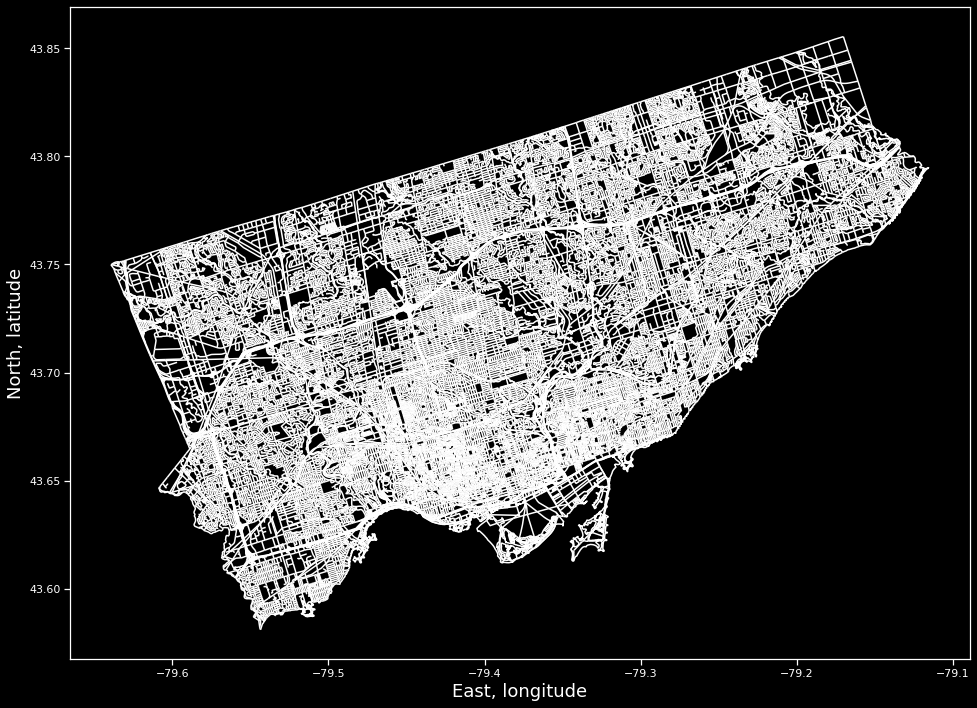

In [10]:
# Plot all of the geometry
ax = centrelines_gpd.plot(figsize=(20, 12))

plt.xlabel('East, longitude', fontsize=18)
plt.ylabel('North, latitude', fontsize=18)
ax.grid(False)

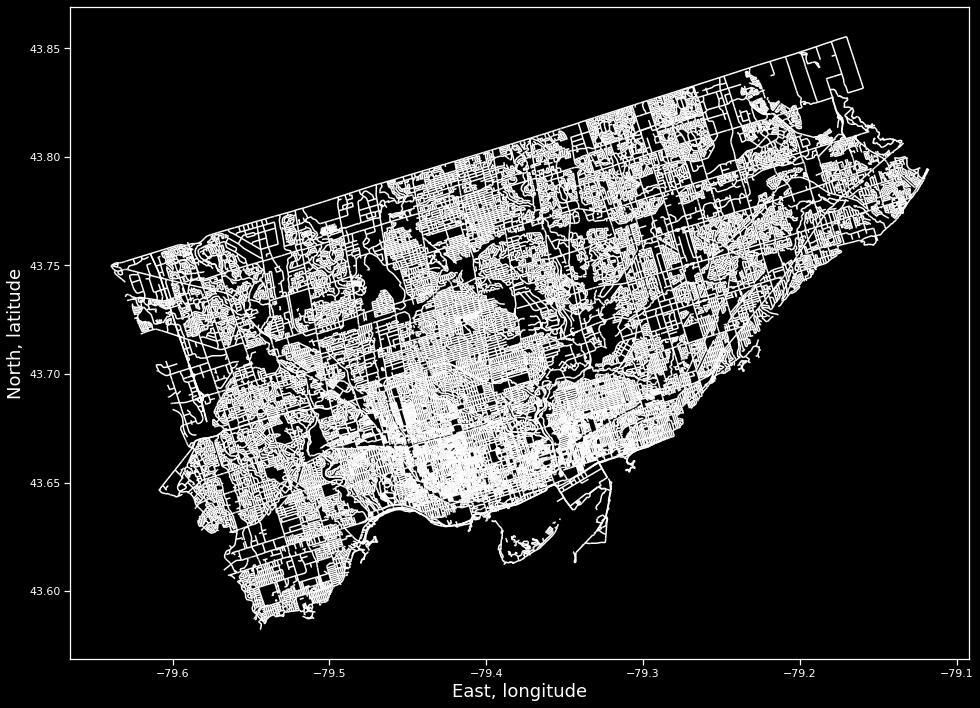

In [18]:
# Plot only the road/cycleable geometry
centrelines_cycling_gpd = centrelines_gpd[centrelines_gpd['FEATURE_CODE_DESC'].isin(cycle_features)]


ax = centrelines_cycling_gpd.plot(figsize=(20, 12))

plt.xlabel('East, longitude', fontsize=18)
plt.ylabel('North, latitude', fontsize=18)
ax.grid(False)

The feature code desc itself may be a usefull feature to dummy encode! <br>
It may be that this one feature describes most of the ccling variance in the city

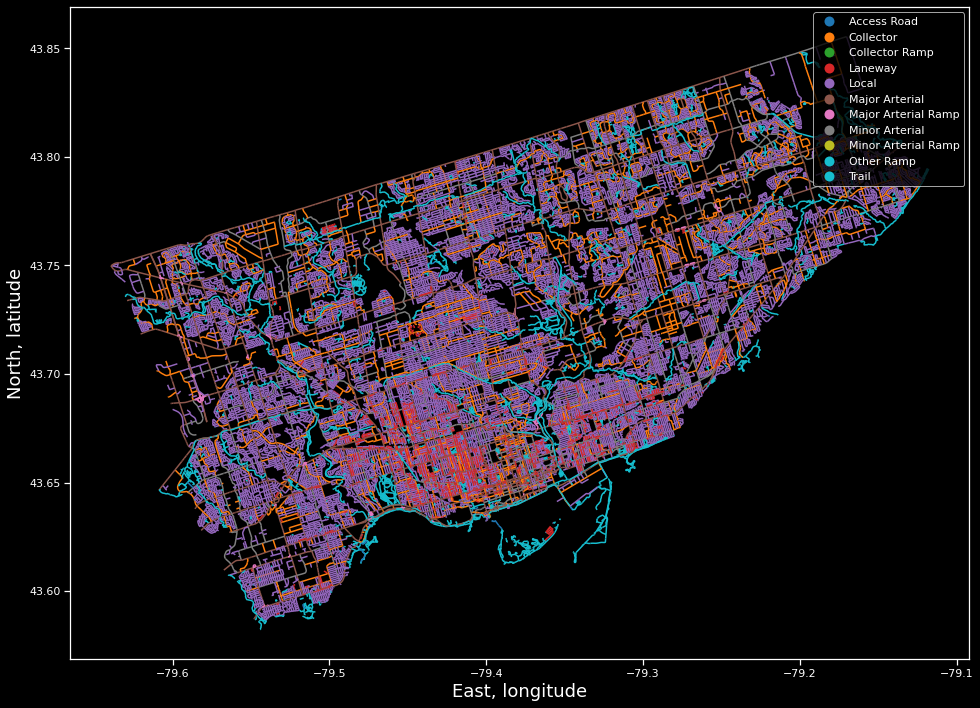

In [19]:
ax = centrelines_cycling_gpd.plot(figsize=(20, 12), column='FEATURE_CODE_DESC', legend=True)

plt.xlabel('East, longitude', fontsize=18)
plt.ylabel('North, latitude', fontsize=18)
ax.grid(False)

### Everything below this line is useless for the project
------------------------------------------------------------------------------------------

In [11]:
# Next we can import the bike volumetric data and plot it on top of the map
# For example, lets do tracked bike volume from temporary stations.
bike_volume = pd.read_csv('C:/Users/keaga/PycharmProjects/1498-ML-Project/data/raw_data/volumes_atr_cyclists_shortterm.csv/volumes_atr_cyclists_shortterm.csv')
bike_volume.head()

,centreline_id,direction,location,class_type,daily_temperature,daily_precipitation,datetime_bin_start,datetime_bin_end,volume
0,8313231,Eastbound,ADELAIDE ST E EB W OF JARVIS ST,Cyclists,26.0,0.0,2018-10-10 23:00:00,2018-10-11 00:00:00,32
1,8313231,Eastbound,ADELAIDE ST E EB W OF JARVIS ST,Cyclists,26.0,0.0,2018-10-10 22:00:00,2018-10-10 23:00:00,50
2,8313231,Eastbound,ADELAIDE ST E EB W OF JARVIS ST,Cyclists,26.0,0.0,2018-10-10 21:00:00,2018-10-10 22:00:00,44
3,8313231,Eastbound,ADELAIDE ST E EB W OF JARVIS ST,Cyclists,26.0,0.0,2018-10-10 20:00:00,2018-10-10 21:00:00,58
4,8313231,Eastbound,ADELAIDE ST E EB W OF JARVIS ST,Cyclists,26.0,0.0,2018-10-10 19:00:00,2018-10-10 20:00:00,145


In [12]:
# Combine the dataframe volume with the geopandas dataframe.
# Make tz aware, aggregate dates by centreline id in the small dataset. Assume rides are on the start day if they cross over midnight.
bike_volume = bike_volume.set_index(pd.DatetimeIndex(bike_volume['datetime_bin_start']), drop=True)
bike_volume.index = bike_volume.index.tz_localize('EST')

random_volumes = bike_volume.groupby('centreline_id').sum()
random_volumes = random_volumes['volume']
random_volumes

# Merge this data to the geodataframe
centrelines_cycling_gpd = pd.merge(left = centrelines_cycling_gpd,
                                   right = random_volumes,
                                   left_on="CENTRELINE_ID",
                                   right_index=True,
                                   how='left')

centrelines_cycling_gpd.sort_values('volume',ascending=False)

,CENTRELINE_ID,LINEAR_NAME_ID,LINEAR_NAME_FULL,LINEAR_NAME_FULL_LEGAL,ADDRESS_L,ADDRESS_R,PARITY_L,PARITY_R,LO_NUM_L,HI_NUM_L,...,ONEWAY_DIR_CODE_DESC,FEATURE_CODE,FEATURE_CODE_DESC,JURISDICTION,CENTRELINE_STATUS,OBJECTID,MI_PRINX,Shape__Length,geometry,volume
61783,30072436,19206,Martin Goodman Trl,Martin Goodman Trail,None,None,N,N,NaN,NaN,...,Not One-Way,204001,Trail,CITY OF TORONTO,None,181549,181549,314.404715,"LINESTRING (-79.38269 43.63945, -79.38374 43.6...",86024.0
61185,7930588,4277,Richmond St W,Richmond Street West,357-409,362-414,O,E,357.0,409.0,...,Follow-Digitization,201200,Major Arterial,CITY OF TORONTO,None,15945,15945,312.897904,"LINESTRING (-79.39328 43.64839, -79.39457 43.6...",72399.0
41178,8416823,458,Bloor St W,Bloor Street West,693-721,692-732,O,E,693.0,721.0,...,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,13061,13061,138.818527,"LINESTRING (-79.41722 43.66383, -79.41842 43.6...",67936.0
21217,14036064,2852,Adelaide St W,Adelaide Street West,373-375,394-398,O,E,373.0,375.0,...,Against-Digitization,201200,Major Arterial,CITY OF TORONTO,None,15947,15947,68.074121,"LINESTRING (-79.39557 43.64674, -79.39616 43.6...",65194.0
61264,1143580,4391,Sherbourne St,Sherbourne Street,None,311-355,N,O,NaN,NaN,...,Not One-Way,201300,Minor Arterial,CITY OF TORONTO,None,24239,24239,315.754702,"LINESTRING (-79.37224 43.66123, -79.37306 43.6...",50548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70820,14659568,1610,Finch Ave W,Finch Avenue West,None,2710-2710,N,E,NaN,NaN,...,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,233949,233949,1270.081460,"LINESTRING (-79.56862 43.74625, -79.57088 43.7...",NaN
70821,20034591,4015,Morningside Ave,Morningside Avenue,2270-2560,None,E,N,2270.0,2560.0,...,Not One-Way,201300,Minor Arterial,CITY OF TORONTO,None,234194,234194,1174.138026,"LINESTRING (-79.22107 43.81970, -79.22182 43.8...",NaN
70822,30131273,4486,Sterling Rd,Sterling Road,72-164,13-219,E,O,72.0,164.0,...,Not One-Way,201500,Local,CITY OF TORONTO,None,234245,234245,865.378190,"LINESTRING (-79.44302 43.65069, -79.44300 43.6...",NaN
70824,20164822,6923,Torbarrie Rd,Torbarrie Road,None,1-83,N,O,NaN,NaN,...,Not One-Way,201400,Collector,CITY OF TORONTO,None,234867,234867,1022.553405,"LINESTRING (-79.51977 43.71942, -79.52000 43.7...",NaN


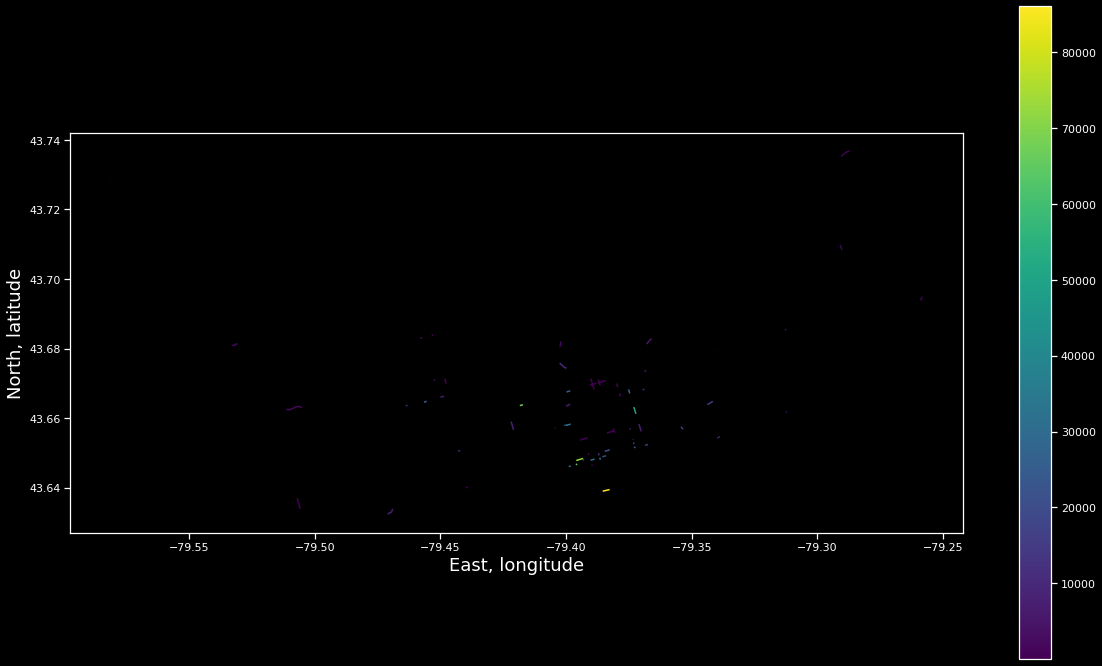

In [13]:
# Plot the results in geopandas
ax = centrelines_cycling_gpd.plot(column='volume',figsize=(20, 12), legend=True)

plt.xlabel('East, longitude', fontsize=18)
plt.ylabel('North, latitude', fontsize=18)
ax.grid(False)

In [16]:
# Now do the same with the permanent volume data.
# Import, Merge, and Plot.
bike_volume_perm = pd.read_csv('C:/Users/keaga/PycharmProjects/1498-ML-Project/data/raw_data/volumes_atr_cyclists_permanent.csv/volumes_atr_cyclists_permanent.csv')
bike_volume_perm.head()
bike_volume_perm['centreline_id']
# Cycling traffic counts are only done at one station... Maybe we do vehicle traffic counts instead?
#either that or intersection data

array([10923449], dtype=int64)